# Example use of the Neural Net Library

This short notebook shows how to use my basic computational graph / neural net library to train a net on a simple, non-linear 3-way classification task.

The example data generation and visualization is taken from the excellent [cs231n notes.](http://cs231n.github.io/)

In [1]:
# Imports and plotting set up
import numpy as np
import neuralnet as nn
import matplotlib.pyplot as plt
%matplotlib inline

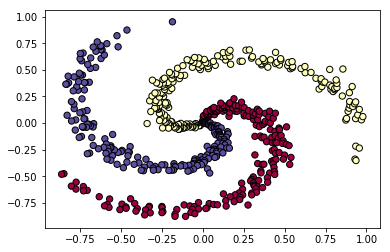

In [2]:
# Data generation
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N * K, D)) # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors = 'k')
plt.show()

In [3]:
# Set up the model
# This is a simple neural net with one hidden layer.
# The first activation function is relu,
# the second activation function is softmax,
# and we use the crossentropy loss
h = 100 # size of hidden layer
In = nn.Ar()
W1 = nn.Ar(shape = (D, h))
b1 = nn.Ar(np.zeros(h))
W2 = nn.Ar(shape = (h, K))
b2 = nn.Ar(np.zeros(K))
Hidden = nn.Relu(In * W1 + b1)
Out = nn.Softmax(Hidden * W2 + b2)
Loss = nn.CrossEntropy(Out)

In [4]:
# Code for ploting the data and the decision boundary of the model above
def make_plot():
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1.value) + b1.value), W2.value) + b2.value
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors = 'k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

========== Epoch 0 ==========
Average training loss: 2.702838
Training accuracy: 0.42


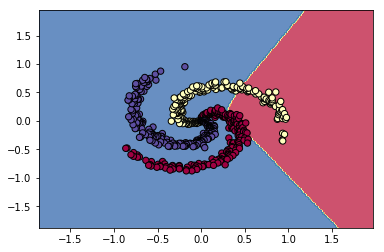

========== Epoch 10 ==========
Average training loss: 0.742098
Training accuracy: 0.73


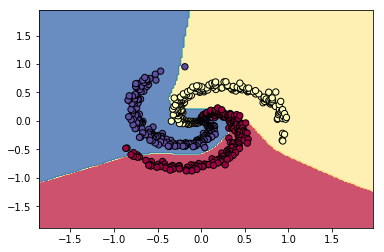

========== Epoch 20 ==========
Average training loss: 0.626541
Training accuracy: 0.80


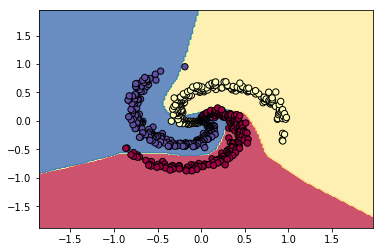

========== Epoch 30 ==========
Average training loss: 0.508156
Training accuracy: 0.82


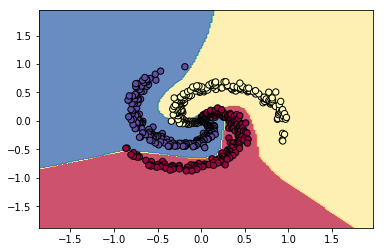

========== Epoch 40 ==========
Average training loss: 0.433089
Training accuracy: 0.85


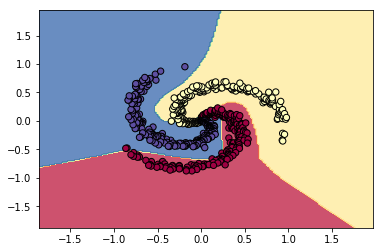

========== Epoch 50 ==========
Average training loss: 0.368181
Training accuracy: 0.88


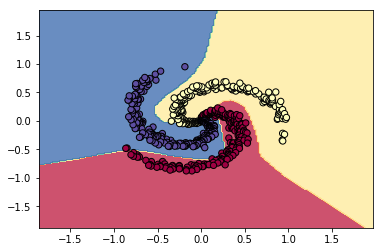

========== Epoch 60 ==========
Average training loss: 0.312626
Training accuracy: 0.91


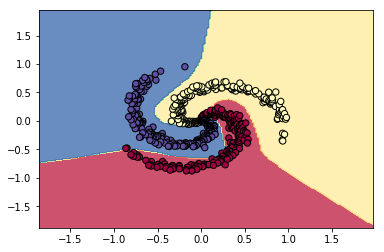

========== Epoch 70 ==========
Average training loss: 0.272060
Training accuracy: 0.93


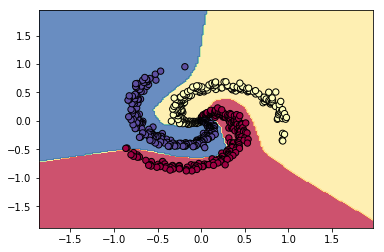

========== Epoch 80 ==========
Average training loss: 0.235330
Training accuracy: 0.94


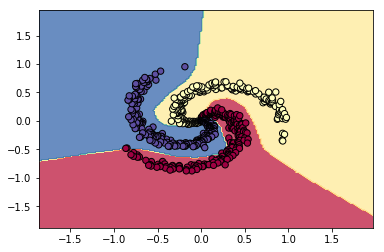

========== Epoch 90 ==========
Average training loss: 0.210034
Training accuracy: 0.95


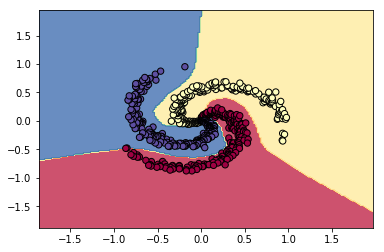

========== Epoch 100 ==========
Average training loss: 0.188471
Training accuracy: 0.95


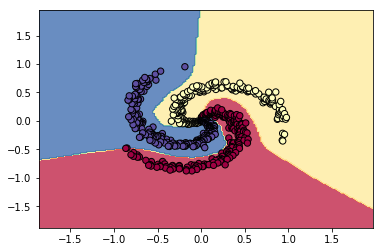

In [5]:
# The main training loop
# calling epoch runs one epoch of training
for i in range(101):
    if i % 10 == 0:
        print(f'========== Epoch {i} ==========')
        nn.epoch(In, Out, Loss, weights=[W1, W2], biases=[b1, b2],
                 batch_size=100, learning_rate=1, X_train=X, Y_train=y)
        make_plot()
    else:
        nn.epoch(In, Out, Loss, weights=[W1, W2], biases=[b1, b2],
                 batch_size=100, learning_rate=1, X_train=X, Y_train=y,
                 verbose=False)